<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/lab_1/lab_1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- # Outline -->

<!-- 1. Downloading R and Rstudio -->

<!--     - R is the program that actually does the statistica analysis. -->

<!--     - Rstudio is an IDE: Integrated Development Environment. -->

<!--     - The job of Rstudio is to present R in such a way that it's useable for normal humans. -->

<!-- 1. Data creation -->

<!--     - Just make it up! -->

<!-- 1. Data inspection -->

<!--     - Did I import my data correctly? -->

<!--     - Do all of my variables have the correct attribute (numerical vs factor for example) -->

<!-- 1. Data manipulation -->

<!--     - Do I need to calculate new variables from the data? -->

<!--     - Do I need to change the shape of my data frame (long to wide) -->

<!--    - Do I need to subset (filter) my data? -->

<!-- 1. Data visualization -->

<!--    - What do the data look like? -->

<!--     Is a linear model even appropriate? -->

<!--     - Do the data seem to follow a particular distribution? -->

<!--    - Does the variance seem constant? (If it isn't, that could be biologically interesting) -->

<!--     Remember: We're not just after means, slopes, or intercepts. -->

<!--     Differences in variation could indicate significant biological differences. -->

<!--     We should choose models that represent the data. -->

<!--     We should **NOT** change the data to fit a model (as a first step). -->

<!--     Realistically, though, all models are wrong. -->

<!--     Do the best you can, and just understand that you may be able to improve for the next paper. -->

<!-- 1. Reading in data from excel -->

<!--     - Excel isn't a good statistical tool. In fact, it can just be wrong. -->

<!--     - However, it's a fantastic data-staging tool, so feel free to use it for that purpose. -->

<!--     - There are also free programs that offer excel-type functions (Google sheets and Libre Office for example) -->

<!-- 1. Markdown (for your interest) -->

<!--     - Makes reports with R easier. -->

<!--     - Could use \LaTeX to create beautiful PDF documents. -->

<!--     - Don't spend too much time on this, if any. -->

<!--     Many journals in the life sciences do not accept \LaTeX or PDFs (as far as I know) -->

<!--     - Markdown can create a `.docx` document using `pandoc` though, so still useful. -->

## Downloading R and Rstudio (Coding Locally)

1.  Download and install R
    -   <https://cran.r-project.org/>

#Lab 1 (R Version)

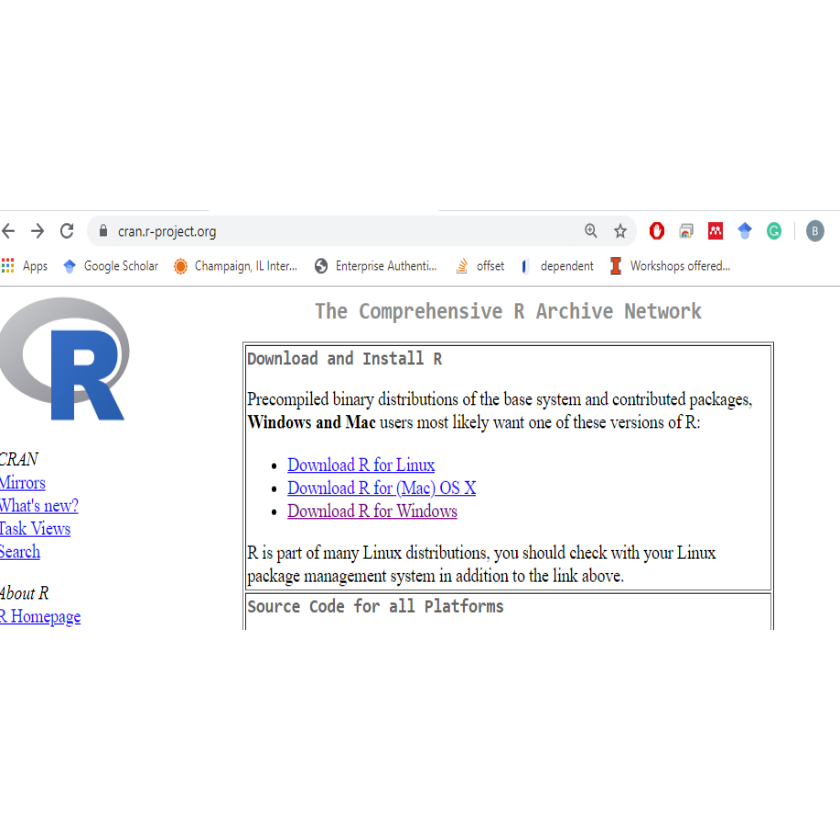

In [26]:
# @title display image

# This chunk will download and process the image, but won't show any code or output other than the image itself.
{
  library(httr)
  library(png)
  library(grid)

  # Download the image from the URL
  url <- "https://raw.githubusercontent.com/xesmaze/cpsc541-fall2024/9beac95826df80abbc78bf4d3a33ac41f4b6515e/lab_1/images/r1.PNG"
  temp <- tempfile(fileext = ".png")
  GET(url, write_disk(temp, overwrite = TRUE))

  # Read and display the image
  img <- readPNG(temp)
  grid.raster(img, width = unit(1, "npc"), height = unit(0.5, "npc"))
}

```         
- We want the `base` option
```

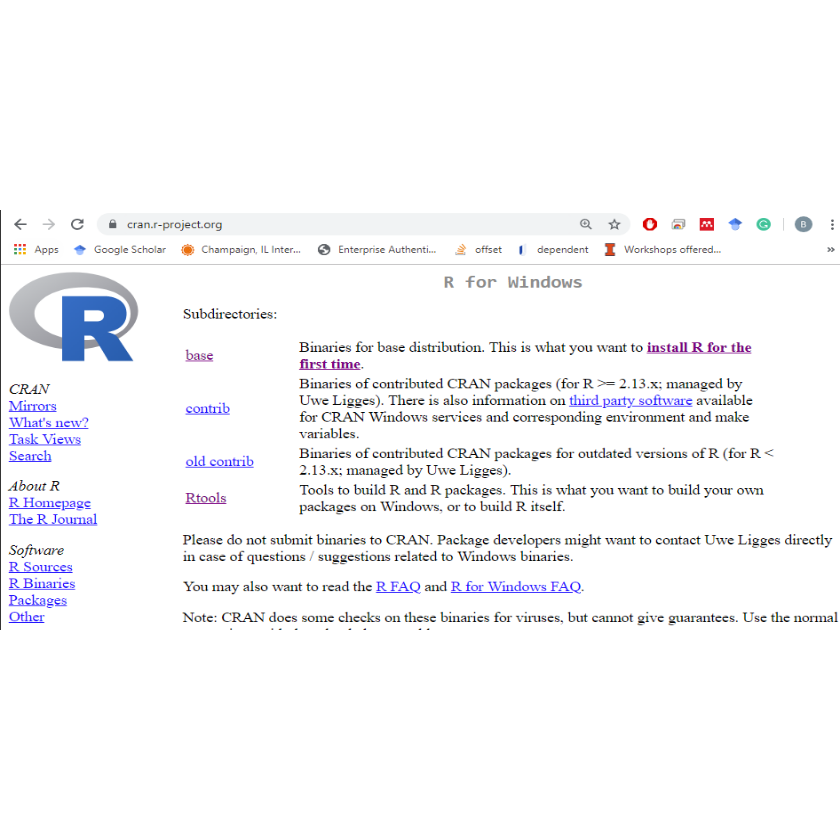

In [42]:
# @title Default title text
{
  # Download the image from the URL
  url <- "https://raw.githubusercontent.com/xesmaze/cpsc541-fall2024/9beac95826df80abbc78bf4d3a33ac41f4b6515e/lab_1/images/r2.PNG"
  temp <- tempfile(fileext = ".png")
  GET(url, write_disk(temp, overwrite = TRUE))

  # Read and display the image
  img <- readPNG(temp)
  grid.raster(img, width = unit(1, "npc"), height = unit(0.5, "npc"))
}

```         
- Download and then install from this page
```

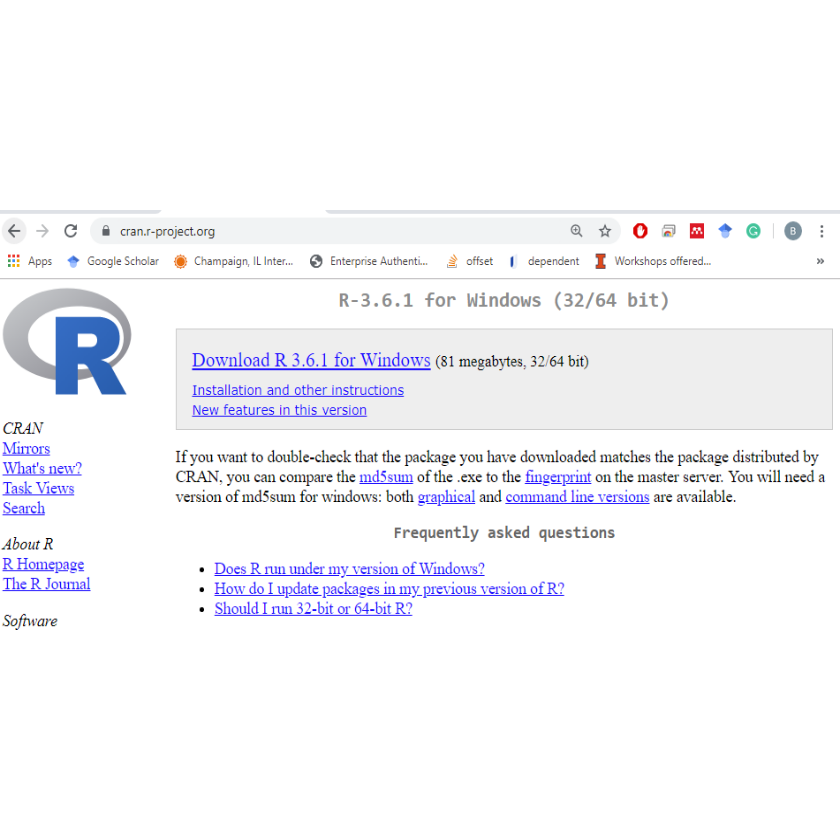

In [43]:
# @title Default title text
{
  # Download the image from the URL
  url <- "https://raw.githubusercontent.com/xesmaze/cpsc541-fall2024/9beac95826df80abbc78bf4d3a33ac41f4b6515e/lab_1/images/r3.PNG"
  temp <- tempfile(fileext = ".png")
  GET(url, write_disk(temp, overwrite = TRUE))

  # Read and display the image
  img <- readPNG(temp)
  grid.raster(img, width = unit(1, "npc"), height = unit(0.5, "npc"))
}

2.  Download and install Rstudio
    -   <https://www.rstudio.com>

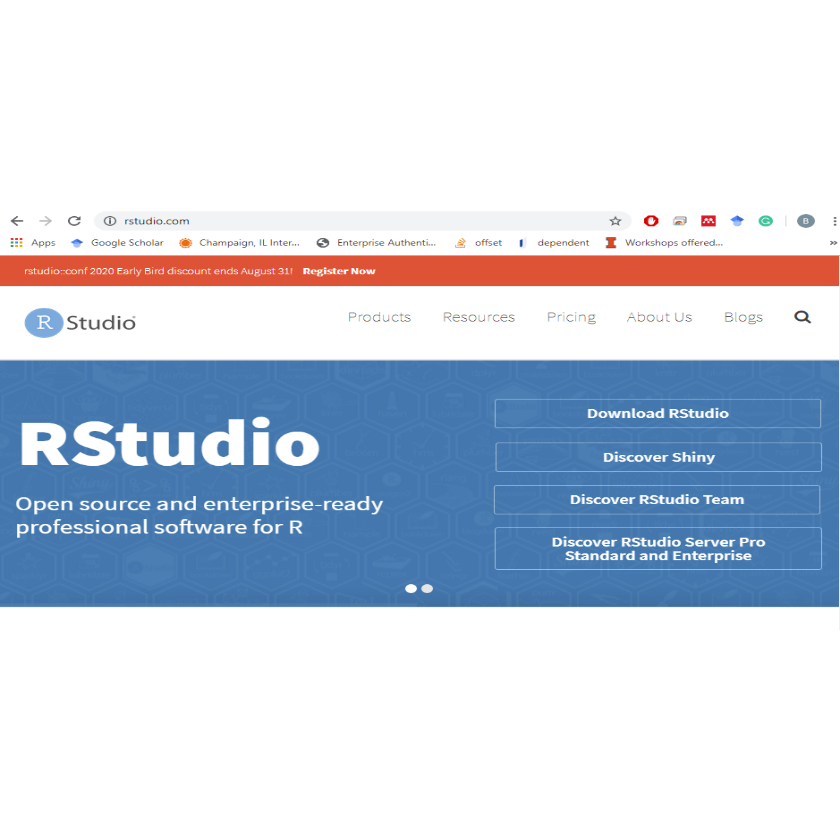

In [44]:
# @title Default title text
{
  # Download the image from the URL
  url <- "https://raw.githubusercontent.com/xesmaze/cpsc541-fall2024/9beac95826df80abbc78bf4d3a33ac41f4b6515e/lab_1/images/r4.PNG"
  temp <- tempfile(fileext = ".png")
  GET(url, write_disk(temp, overwrite = TRUE))

  # Read and display the image
  img <- readPNG(temp)
  grid.raster(img, width = unit(1, "npc"), height = unit(0.5, "npc"))
}

```         
- Select the free desktop option (first button from the left)
```

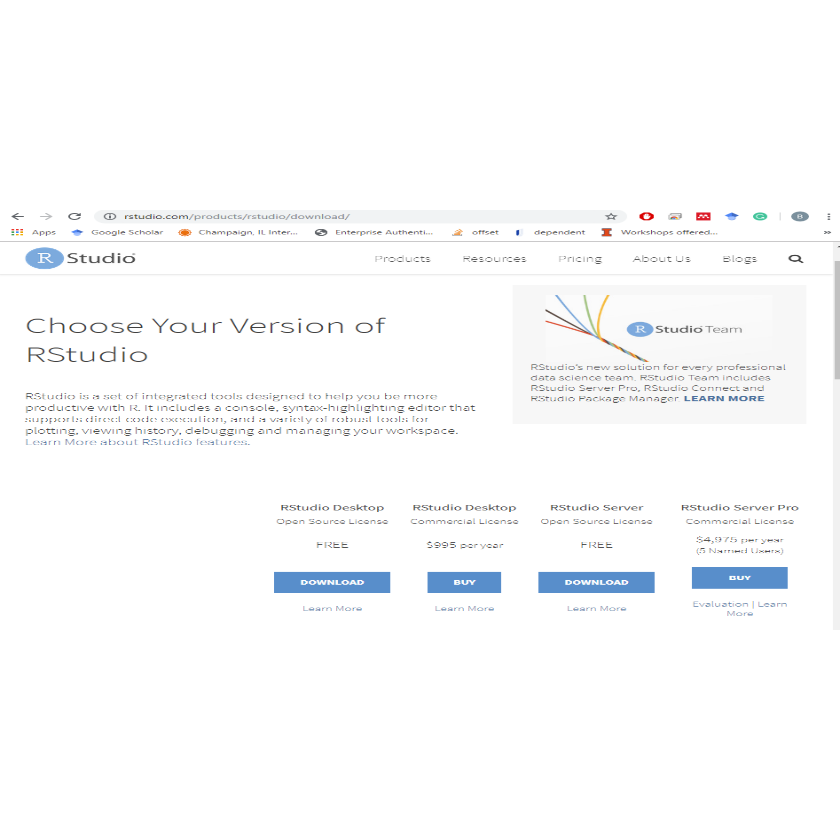

In [45]:
# @title Default title text
{
  # Download the image from the URL
  url <- "https://raw.githubusercontent.com/xesmaze/cpsc541-fall2024/9beac95826df80abbc78bf4d3a33ac41f4b6515e/lab_1/images/r5.PNG"
  temp <- tempfile(fileext = ".png")
  GET(url, write_disk(temp, overwrite = TRUE))

  # Read and display the image
  img <- readPNG(temp)
  grid.raster(img, width = unit(1, "npc"), height = unit(0.5, "npc"))
}

```         
- Select the installer for your operating system.
Download and install.
```

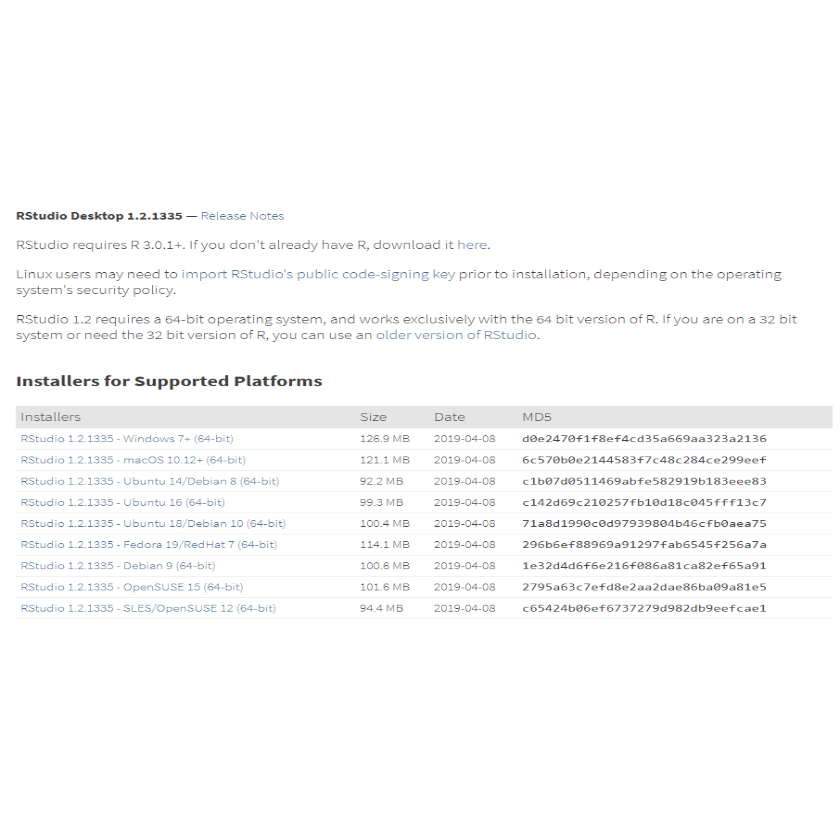

In [47]:
# @title Default title text
{
  # Download the image from the URL
  url <- "https://raw.githubusercontent.com/xesmaze/cpsc541-fall2024/9beac95826df80abbc78bf4d3a33ac41f4b6515e/lab_1/images/r6.PNG"
  temp <- tempfile(fileext = ".png")
  GET(url, write_disk(temp, overwrite = TRUE))

  # Read and display the image
  img <- readPNG(temp)
  grid.raster(img, width = unit(1, "npc"), height = unit(0.5, "npc"))
}

# Data creation

Let's create some linear regression data from the ground-up.

For linear regression, we can look at a statistical model as being made from two components:

1.  A functional relationship between two variables.

$$y_i = f(x_i)$$ This component is deterministic. That means that there's no randomness, for every $x_i$ we produce only 1 value for $y_i$.

2.  A probability distribution to describe error. We'll use the normal distribution to start.

$$\epsilon_i \sim \mathcal{N}(0,\sigma^2)$$ This component is stochastic. That means it's random.

The true statistical model is:

$$y_i \sim f(x_i) + \epsilon_i$$ or, for simple linear regression

$$\underbrace{y_i}_{DV} \sim \underbrace{\beta_0}_{Intercept} + \underbrace{\beta_1}_{slope}\underbrace{x_i}_{IV}+\underbrace{\epsilon_i}_{error}$$ where DV is dependent variable, and IV is independent variable.

## Create a functional relationship

Let's create a data frame of $x$ and $y$ values linked by a functional relationship. We'll say that the slope is 5, and the intercept is 2.

In [1]:
# Create a data frame of x values
# This creates a data frame object with 50 rows and 1 column (x)
# The values of x are sequential integers from 1 to 50
# I've classified these values to be stored as "numeric".
# We can perform all normal math operations on numeric data

df <- data.frame(xvar = as.numeric(1:50))

# Easy!
# Check the data frame to make sure it is what we think it is

df

# Check the data structure (is it a data frame?) and the variable classes (numeric?)
str(df)

# how do the first rows look?
head(df)

# do we have all 50 rows?
tail(df)

# Great!
# Load an R package called "Tidyverse"
# Tidyverse is a collection of R packages that work well together
# The point of these packages is to manipulate and visualize data

library(tidyverse)

# Using tidyverse, we can modify our data frame to create a new variable, just like in excel


df <- df %>% # %>% is called a piping operator, it connects these 2 lines of code
    mutate(yvar = 5 + 2*xvar)

# mutate is the command to create a new variable
# The new variable can be based on old variables, in this case, 'x'

# Inspect the new data frame on your own.
# Are the variables sill both numeric?
# Is it still a data frame?


xvar
<dbl>
1
2
3
4
5
6
7
8
9


'data.frame':	50 obs. of  1 variable:
 $ xvar: num  1 2 3 4 5 6 7 8 9 10 ...


,xvar
,<dbl>
1,1
2,2
3,3
4,4
5,5
6,6


,xvar
,<dbl>
45,45
46,46
47,47
48,48
49,49
50,50


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Plot the functional relationship

`tidyverse` includes several useful packages. One of them is `ggplot2`, we'll use it for plotting pretty graphs.

In [ ]:
# Create an object called "p1" using ggplot2

p1 <- ggplot(data = df, aes(x = xvar, y = yvar)) +
    geom_point()
p1


There's a cheater-y way to learn `ggplot2`. Load package `esquisse`, and use the `esquisser` function on the data.

In [30]:
# Remember to remove the pound sign (hashtag, if you're born after 1995?) from the 'esquisser' line
# This function helps with some of the har
install.packages("esquisse")
library(esquisse)
# esquisser(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Note that `esquisse` lets you export the `ggplot2` code including all of your customizations. I don't think that `esquisse` makes use of the full power of `ggplot2`, but it can give you a head start.

## Create the error

We need to generate error if we want to mimic a real statistical relationship. We can do that using the random number generators in R.

In [31]:
set.seed(90210)
e <- data.frame(error = rnorm(n = 50, mean = 0, sd = 10))

A quick and dirty way to make histograms is to use the `hist()` function. Let's do that now to confirm that our data are normal-ish.

## Plot the error: histogram

In [ ]:
hist(e$error)
# Notice the $ sign.
# If you name a data frame, followed by a $ sign, you can reference a specific column
# e[,1] woul have also worked
# it means dataframe[row, column]


***Quick aside***

Notice the \$ sign in the previous code. If you name a data frame, followed by a \$ sign, you can reference a specific column. e[, 1] would have also worked. The `dataframe[i, j]` notation allows you to reference the $i^{th}$ row and $j^{th}$ column.

Try this out with the `df` data frame. See if you can figure out how to pull:

1.  row #2 only
2.  column #2 only
3.  The value at row 2, column 2.

The `[i, j]` notation works for matrices and vectors as well.

## Plot the error: density

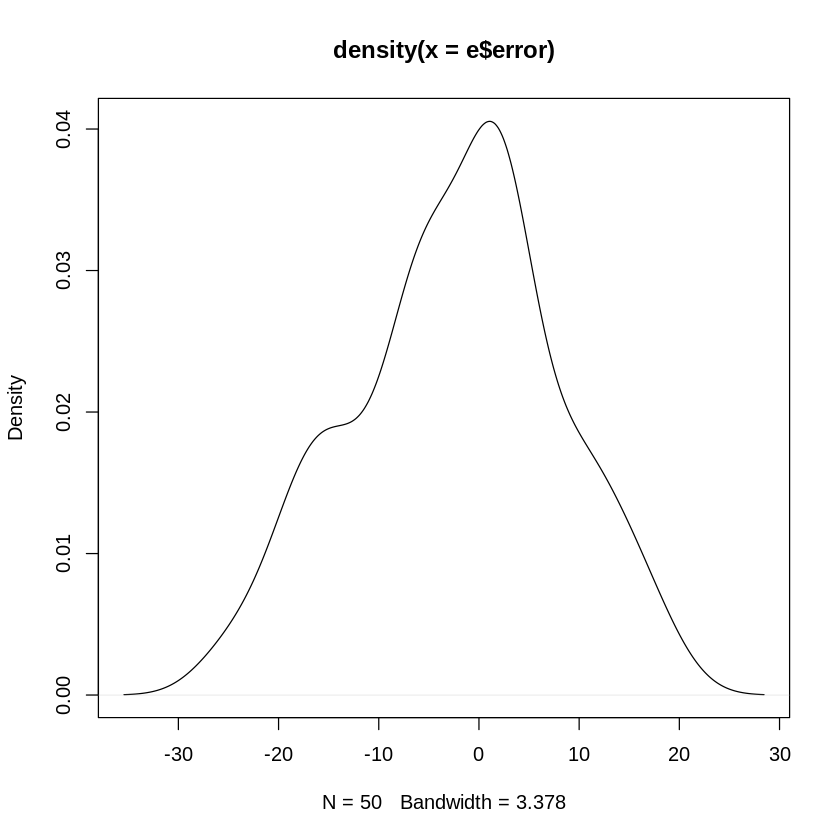

In [33]:
# Notice that there are nested commands here.
# The density function acts first, and then the plot function
plot(density(e$error))

## Plot the error: horizontal barplot

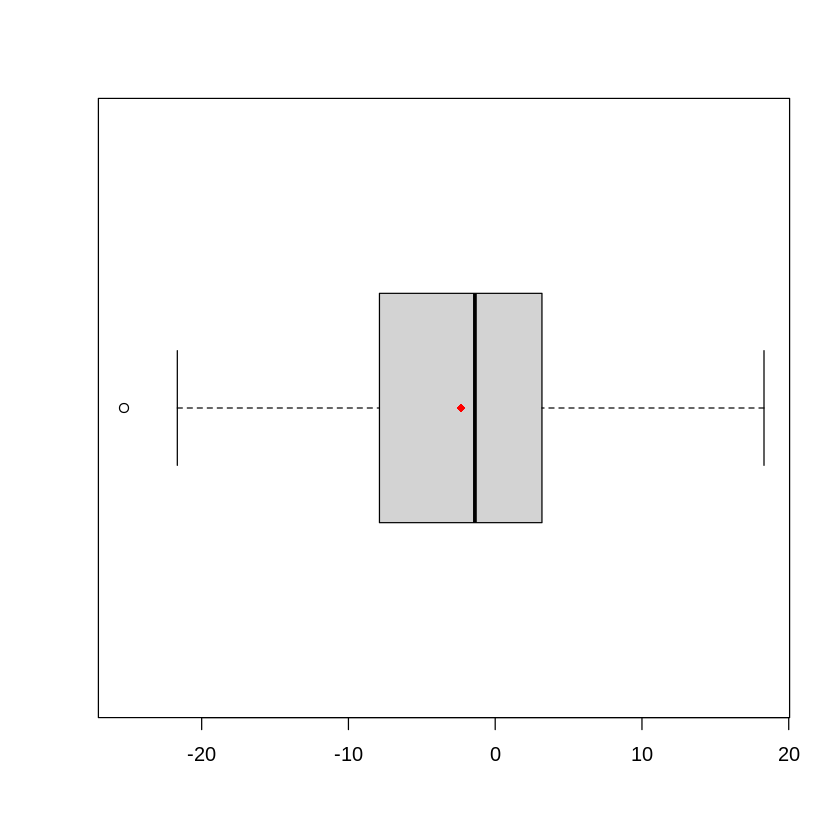

In [34]:
# Notice that there are nested commands here.
# The density function acts first, and then the plot function
boxplot(x = e$error,horizontal = T)
points(x = mean(e$error),y = 1,col="red",pch=18)


Looks alright. Keep this in mind whenever you check the assumption of normality for real data: it's not always pretty, but sometimes it's good enough.

## Create the statistical relationship

OK! Let's combine these components to simulate some regression data.

In [35]:
set.seed(90210)
df2 <- data.frame(xvar = as.numeric(1:50),
                 e = rnorm(n = 50, mean = 0, sd = 10))

# Easy!
# Check the data frame to make sure it is what we think it is

df2

# Check the data structure (is it a data frame?) and the variable classes (numeric?)
str(df2)
head(df2)
tail(df2)

df2 <- df2 %>%
    mutate(yvar = 5 + 2*xvar + e)

xvar,e
<dbl>,<dbl>
1,-4.4363243
2,-5.1480067
3,11.8067061
4,15.7318685
5,0.9336022
6,1.6514287
7,-3.3852528
8,-7.7974194
9,3.8552830


'data.frame':	50 obs. of  2 variables:
 $ xvar: num  1 2 3 4 5 6 7 8 9 10 ...
 $ e   : num  -4.436 -5.148 11.807 15.732 0.934 ...


,xvar,e
,<dbl>,<dbl>
1,1,-4.4363243
2,2,-5.1480067
3,3,11.8067061
4,4,15.7318685
5,5,0.9336022
6,6,1.6514287


,xvar,e
,<dbl>,<dbl>
45,45,10.481706
46,46,-15.409854
47,47,-8.436192
48,48,12.778847
49,49,2.278290
50,50,-1.385758


## Plot the statistical relationship

`geom_smooth()` using formula = 'y ~ x'


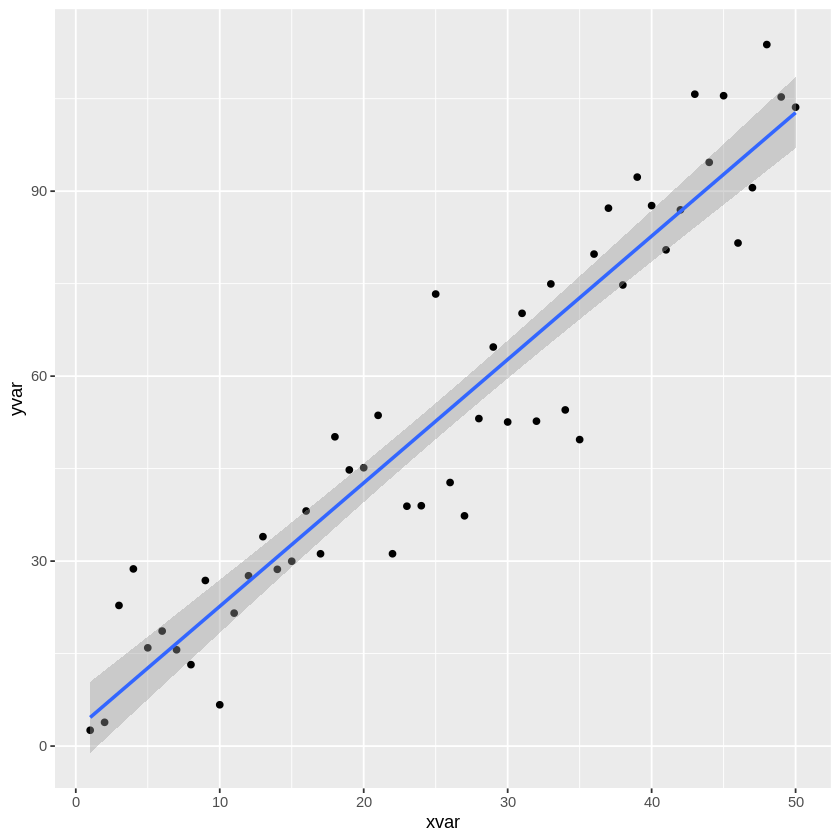

In [36]:
# Create an object called "p1" using ggplot
# method = lm creates the line
# se=TRUE gives the confidence interval
# Neat?

p2 <- ggplot(data = df2, aes(x = xvar, y = yvar)) +
    geom_point()+
    geom_smooth(method=lm, se=TRUE)
p2


# Distribution functions in R

The distribution functions in R have the following format and functionality.

1.  Prefix (r, p, q, d) denoting what we're trying to do with the distribution.
    -   r: generate random values from a specified distribution
    -   p: calculate the left tailed probability of a particular quantile given a distribution. This can be changed to right tail. This is equivalent to using a *z-score* to find a probability Be careful with discrete distributions.
    -   d: Careful here. For discrete distributions, this is the probability of seeing a particular value. For continuous distributions, this is the *height* at a particular value. Remember that we need height and width to calculate a probability for a continuous distribution.
    -   q: calculate a quantile given a left-tailed probability. This can be changed to right tail.
2.  Suffix (norm, pois, binom... etc.), abbreviated names of distributions.
    -   Use `?distributions` to find all the base distributions available.

In [37]:
# The ? symbol will pull up a help file if you write it in front of a package or function
# Delete the pound sign first

# ?distributions

Here's a different way to plot distributions. Let's use the `beta` distribution. Notice that the `beta` distribution doesn't take `mean` or `sd` arguments. Different distributions have different sufficient statistics.

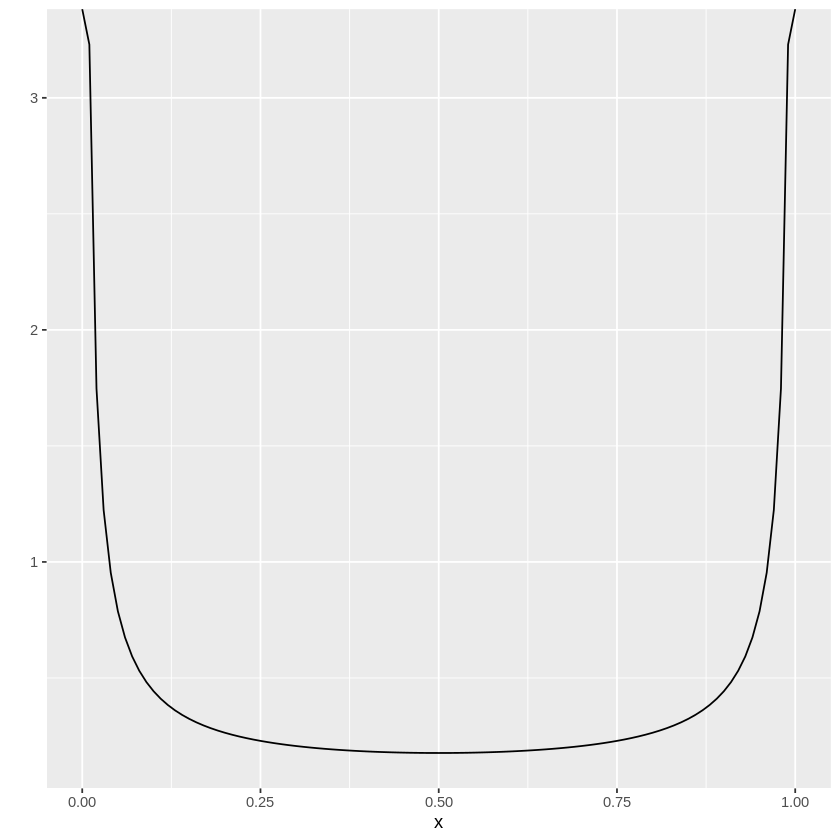

In [38]:

p4 <- ggplot(data = data.frame(x = c(0, 1)), aes(x)) +
  stat_function(fun = dbeta, n = 101, args = list(shape1 = .1, shape2 = .1)) + ylab("")
p4

Also, for those interested, notice that the area under the curve is 1, so this is a valid PDF.

In [39]:
pbeta(q = 1,shape1 = 0.1,shape2 = 0.1)

[1] 1

# Self Study

Take this time to visualize some of the error distributions on your own. Use histograms, density plots, and boxplots.

Create a new regression line with non-normal errors. How's it look?

# Extra: let's actually analyze our first regression model using `df2`

You came to learn regression, right?

In [40]:
#lm() stands for linear model
# R won't produce output in the way that SAS does, we have to ask for the output we need.

fit <- lm(yvar ~ xvar, data = df2)

# See? Nothing happens.
# We have to ask nicely.
# summary() and anova() call up something that looks familiar

summary(fit)
anova(fit)



Call:
lm(formula = yvar ~ xvar, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0013  -5.5597   0.9162   5.4365  20.6247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.645      2.958   0.894    0.376    
xvar           2.002      0.101  19.829   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.3 on 48 degrees of freedom
Multiple R-squared:  0.8912,	Adjusted R-squared:  0.8889 
F-statistic: 393.2 on 1 and 48 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
xvar,1,41726.317,41726.3172,393.2015,9.152035e-25
Residuals,48,5093.733,106.1194,NA,NA


With this regression model we're trying to estimate 3 parameters:

1.  Intercept
2.  Slope
3.  Error variance

Essentially, the statistical puzzle we're faced with in the real world is:

$$y_i \sim \underbrace{?}_{Int} + \underbrace{?}_{slope}\cdot x_i + \epsilon_i$$ where $$\epsilon_i\sim \mathcal{N}(0,\underbrace{?}_{Var})$$

From the `summary` output we see that the intercept estimate $b_0$ is `r round(coef(fit)[1],2)`. The estimate for the slope $b_1$ is `r round(coef(fit)[2],3)`. What were the true parameters? Can you spot the estimate of the variance?

Both the `summary` and the `anova` output show that our slope estimate is significantly different from zero. This is important, this is a major point of simple linear regression. It means that there is a positive relationship between $xvar$ and $yvar$. From our graphs, we suspect that it's a linear relationship. If you see the $R^2$ value, you'll may also be able to recognize that it's a strong relationship. ($\sqrt{R^2} = r =$ `r sqrt(summary(fit)$r.squared)`). We hope to get to that later in the course.

The `summary` output shows that the intercept is not significantly different from zero. We often don't care too much about the intercept, it just helps the model fit nicely. There are cases where the intercept will matter, however a lot of the time the value $x=0$ isn't within our inference space.

Let's plot the residuals.

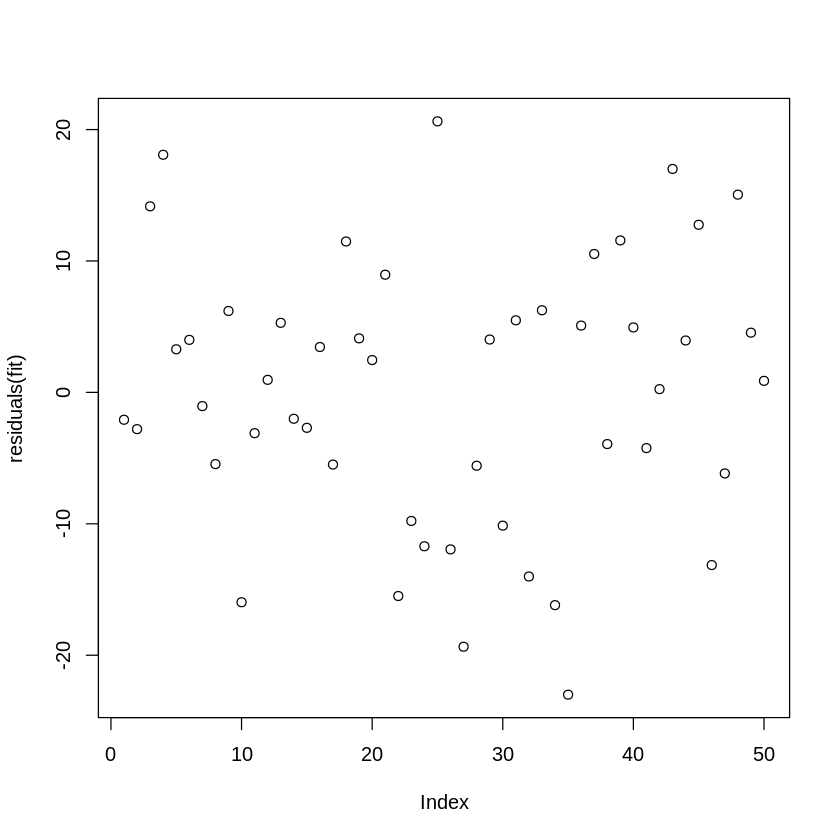

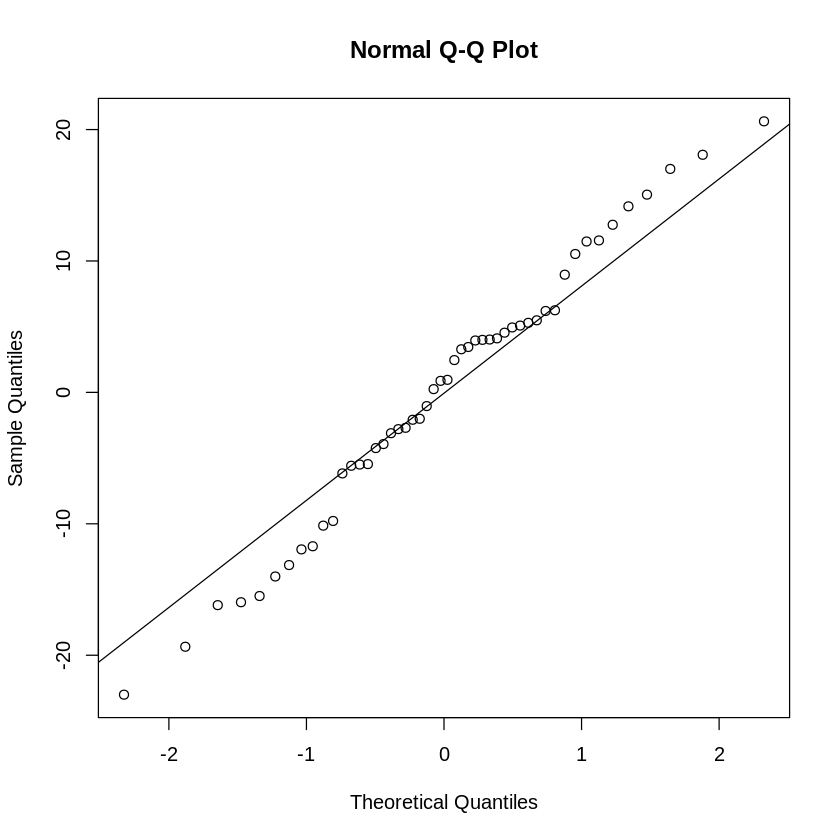

In [41]:
plot(residuals(fit))
qqnorm(residuals(fit))
qqline(residuals(fit))


Not great, but these procedures are robust to departures from normality. They tend to not be robust to departures from homogeneity. It doesn't look like we have problems with homogeneity.

Isn't it a little crazy that we'd question these residuals? We know for a fact that they come from a normal distribution, we simulated it ourselves.

Don't be *too* critical of your own residuals, especially with smalle sample sizes. Random is random.

<!-- # Data manipulation -->

<!-- # Data visualization -->

<!-- # Reading data in from excel -->

<!-- 1. Create a work folder on the desktop. -->

<!-- 1. Open Rstudio and set your working directory to your work folder. -->

<!--     - Next level maneuver: You could instead create a new project in your work folder. -->

<!--     This is a much nicer solution in many cases, but it is not required. -->

<!-- 1. Create an excel document and input your data (one should already be provided). -->

<!-- 1. Save the document as a `.csv` file in your work folder. -->

<!--     - Let's assume that you've named it `lab1.csv` -->

<!-- 1. Use the following code to import your data into R and save it as an object named `df`. -->

<!-- ```{r} -->

<!-- df <- read.csv("C:/Users/bca2/Google Drive/PHD/Class work/2019/Fall/CPSC 541/Lab/Lab1/lab1.csv") -->

<!-- ``` -->

<!-- 1. Note: "<-" is called the assignment operator. -->

<!-- We assign the imported data frame to the object `df`. -->

<!-- In many cases (all?) where you can use the assignment operator, you could use the `=` sign instead, -->

<!-- However, the reverse is not true, an assignment operator cannot always replace `=` (within functions for example). -->

<!-- # Data inspection -->

<!-- We need to make sure that we've imported the right data, and that the variables are properly defined. -->

<!-- 1. Use the functions: `str()`,`head()`, and `tail()` -->

<!-- ```{r} -->

<!-- str(df) -->

<!-- head(df) -->

<!-- tail(df) -->

<!-- ``` -->

<!-- Note that `str()` let's us know how the variables are defined within R -->

<!--     - Factors, characters, numeric, integer -->

<!--     - Factors and characters are similar in how R treats them -->

<!--     - Numeric and integer are similar in how R treats them -->

<!--     - If you want to change how a variable is defined us the `as.*` family of functions -->

<!-- ```{r} -->

<!-- df$x <- as.factor(df$x) -->

<!-- str(df) -->

<!-- df$x1 <- as.numeric(df$x) -->

<!-- str(df) -->

<!-- head(df) -->

<!-- df$x2 <- as.numeric(as.character(df$x)) -->

<!-- str(df) -->

<!-- head(df) -->

<!-- ``` -->

<!-- # Data visualization -->

<!-- ```{r} -->

<!-- hist(df$x2) -->

<!-- ``` -->

<!-- # Data simulation -->